Amaan Hassanali (with some help from Sarah Teng & Anika Vaishampayan)
PIC 16A
Homework 7
12/02/2020

I affirm that I personally wrote the text, code, and comments in this homework assignment.

# Homework 7

## Problem 0

It is highly recommended that you work with your group to fully complete the Discussion assignments on 11/17, 11/19, and 11/24, as these will directly help with your project. 

## Problem 1

In your project, you are required to demonstrate the use of decision trees and multinomial logistic regression classifiers. Groups of three must also demonstrate the use of one additional model. In this homework assignment, you will write a detailed report that will largely fulfill this requirement. 

Choose one machine learning model, other than decision trees and multinomial logistic regression (unless you are a group of 2 -- see below). Some possibilities include, but are not limited to: 

- Support vector classifiers (`sklearn.svm.SVC`). Complexity parameter is called `gamma`. Higher values create more complex models)
- K-nearest-neighbor classifiers (`sklearn.neighbors.KNeighborsClassifier`). Complexity parameter is called `n_neighbors`. Higher values create less complex models. When working with KNN models, it is helpful to standardize your data columns first. For this purpose, `sklearn.preprocessing.StandardScaler` can be used. 
- Multilayer perceptron classifier, a kind of neural network (`sklearn.neural_network.MLPClassifier`). The complexity is controlled by the number of neurons and layers, as specified by the `hidden_layer_sizes` parameter -- more neurons and layers correspond to more complex models. 

You should consult the documentation for these models, which is available online or via `?`. 

**Suggestion**: It is recommended, but not required, that you coordinate with your group members so that each of you explores a different model. It is similarly suggested, but not required, that each of you use different subsets of three columns so that you can each learn something about different parts of the data. You are encouraged to help each other out on all parts of this problem. 

#### Groups of 2

If you are a group of 2, you are not required to use an additional model and may instead use multinomial logistic regression for this assignment. Please note this in your submission. 

- Multinomial logistic regression (`sklearn.linear_model.LogisticRegression`). The complexity is controlled by `C`, the inverse regularization strength. Larger values of `C` correspond to more complex models. If you demonstrate multinomial logistic regression for this problem, you should also demonstrate cross-validation to select a small feature set. That is, you should (a) skip step 2 below and (b) use CV to select a set of three features, including one qualitative feature and two quantitative ones. 

### Instructions

Replicate and expand the pipeline from Discussion 15, substituting out decision trees for your chosen classifier. You may also choose a different set of three columns than the ones used in that Discussion activity. In particular, you should: 

1. **Load** the data. 
2. **Select no more than three predictor columns** of the data and the `Species` target column, discarding the others. Choose one qualitative predictor column (e.g. `Island`, `Sex`) and two quantitative predictor columns. 
2. **Split the data** into training and test sets. 
3. Write one or more functions to **clean and transform the data** as needed. You should add comments and function docstrings as appropriate to describe to your reader what you are doing and why. Apply your functions to the training and test sets. 
4. **Use cross-validation** to estimate an optimal complexity parameter for your model. 
5. Having selected an optimal complexity parameter, **evaluate your model on the test set.** 
6. **Inspect** a few instances in which your trained model gave the wrong answer on the test set. Explain why your model was "tricked" in this case? Create and comment on a confusion matrix -- [check Monday's lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/digits.ipynb) for an example. 
7. **Plot the [decision regions](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/live-lecture-22.ipynb)** for your model. The horizontal and vertical axes should be the two quantitative predictor variables that you selected. Create a separate plot for each possible value of the qualitative predictor variable that you selected. For example, if you chose `Sex` as your qualitative variable, you should show two plots, with the decision regions for Female and Male penguins separately. Add appropriate axis labels and any other measures required to make your plots look professional. Add commentary to contextualize the mistakes that your model made. 

Throughout, add helpful explanation for your reader. For example, you should explain the idea behind cross-validation; anything you are able to learn about how your model works; how to interpret the optimal complexity parameter; and why your model went wrong in certain cases.  

### Specifications

Your solution should **not** fit in a single code cell -- a good, readable, and adequately-explained solution will likely require at least one code cell for each of the eight steps above. Make sure that there is plenty of surrounding text explanation and comments. Add code cells and plenty of markdown cells as needed. You can also use section headers with `###` to organize your work. **Treat this problem as 50% coding assignment and 50% clearly-written lab report.**

Your comments and explanation should be written to an imaginary reader who has never encountered the Palmer Penguins data set before, and knows less about machine learning than you do. Explain your steps. Why train-test split? Why cross-validation? Why decision regions? And so on. If you'd like, imagine that you are writing to a time-traveller version of you from two weeks ago. 

## Your Solution

In [1]:
# ... 

# Step 1: Loading the Data

To begin with, we must first import the *urlib* library in order to extract the data from the github website. Following this, we open and then read the data from the palmer_penguins.csv file. The dataframe from the file is stored in a variable *penguins*.

**NOTE**: To avoid spreading out of code and for the purposes of coherence, all imports are done prior to their use.

In [2]:
import urllib
import pandas as pd

In [3]:
url = 'https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'
filedata = urllib.request.urlopen(url) #Retrieving data
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())

In [4]:
penguins = pd.read_csv("palmer_penguins.csv") #Reading the data
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


# Step 2: Selecting Predictor Columns

Since we were working as a group (of 3), and there were 2 major qualitative and 6 quantitative variables available, we split the the quantitive variables evenly whereas the qualitative variables were open to choice provided that at least one person did each. I was designated the *Delta 15 N (o/oo)* and *Delta 13 C (o/oo)* columns for quantitative data, and decided to work with the *Sex* column for my qualitative column. So, to use these columns rather than the entire dataframe, it sufficed to store the *penguins* variable as a dataframe with those specific columns. To begin, we import numpy and then simply reassign the penguins variable. Also, we use *.dropna()* to rid ourselves of *nan* values.

In [5]:
import numpy as np

In [6]:
penguins = penguins[["Species", "Sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]] #Picking only relevant columns
penguins = penguins.dropna() #Dropping nan values
penguins

,Species,Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),FEMALE,8.36821,-25.33302
4,Adelie Penguin (Pygoscelis adeliae),FEMALE,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),MALE,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),FEMALE,9.18718,-25.21799
...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),FEMALE,7.99184,-26.20538
340,Gentoo penguin (Pygoscelis papua),FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),FEMALE,8.24246,-26.11969


# Step 3: Splitting the Data

For the purposes of diagnosing overfitting, we split the data into testing (holdout) data, and training (seen) data. To do so, we need an *X* for predictor variables and *y* for target variables. The target variable is the *Species* column, since this is the end goal of the model, whereas the predictor variables are the *Sex*, *Delta 15 N (o/oo)*, and *Delta 13 C (o/oo)* columns because we use them to determine the species. For the *X* variable, the *Species* column needs to be removed. As for the *y* variable, this is reassigned to the *Species* column. For splitting the data, we use the *train_test_split* function from *sklearn*, with a test_size of 0.2, such that the training data is 80% of the penguins data set, and the remaining is the test data. As such, we must import the required function from sklearn, and then proceed.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Splitting into training and testing data
X = penguins.drop(["Species"], axis = 1) #Dropping the Species column from X
y = penguins["Species"] #Making y 'contain' the Species column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #Creating training and testing data

# Step 4: Cleaning and Transforming the Data

Having split the data, data cleaning (i.e. converting the data into purely numerical form for use in the algorithm) becomes necessary since "machine learning algorithms don't really get text" (Chodrow, 2020). In this case, the *Sex* column from X has to be transformed into 1s - for females - and 0s - for males. In order to achieve this, we use a function *clean_data* that cleans the data using the *preprocessing* tool from *sklearn*.

In [9]:
from sklearn import preprocessing

In [10]:
#Cleaning the data
def clean_data(X, y):
    """
    Takes X - predictor variable data and y - target variable data
    Cleans the data.
    Returns the cleaned data.
    """
    #Copying data
    X2 = X.copy() 
    y2 = y.copy()
    le = preprocessing.LabelEncoder()
    X2["Sex"] = le.fit_transform(X2["Sex"]) #Converting "FEMALE" and "MALE" to numerical values
    return X2.values, y2, X2.columns #Returning data

X_train, y_train, labels = clean_data(X_train, y_train)
X_test, y_test, labels = clean_data(X_test, y_test)

# Step 5: Using Cross-Validation

To estimate the optimal complexity (i.e. the number of features included in the model) for the model, it is necessary to implement cross-validation. Before doing this, my group and I had to decide on our choices of models; I ended up with K-Nearest Neighbors, which assumes that similar sets of data tend to be closer together. To use K-Nearest Neighbors, one may create their own function and implement it using different types of distances, however, sklearn provides *KNeighborsClassifier*, which does this for us. Again, using this requires importing the function from *sklearn.neighbors* and applying it with complexity parameter *n_neighbors*, as well as *cross_val_score* from *sklearn.model_selection*. Consider the following example where *n_neighbors* = 4.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [12]:
knn = KNeighborsClassifier(n_neighbors = 4) #Trying the classifier with n_neighbors = 4
knn.fit(X_train, y_train) #Fitting the training data
knn.score(X_train, y_train) #Scoring the training data

0.8884615384615384

That was a fairly high score, but can we do even better? Perhaps. Now, consider cross-validation to find the best n_neighbors parameter and best cvscore. Additionally, a graph has been used to better illustrate cross-validation in action (importing pyplot from matplotlib is necessary for graphs).

In [13]:
from matplotlib import pyplot as plt

[Text(0.5, 1.0, 'Best neighbors: 7, Best score: 0.8576923076923076')]

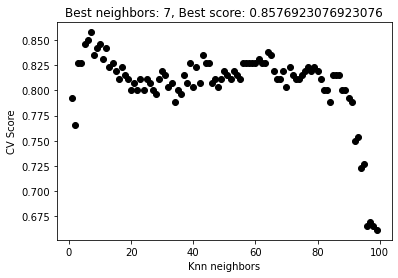

In [14]:
#Cross-validation on model
fig, ax = plt.subplots(1) #Creating a subplot
ax.set(xlabel = "Knn neighbors", ylabel = "CV Score") #Setting x and y labels
best_neighbors = 0 #The best neighbors
best_score = 0 #The best score
#For-loop iterates through 100 different sets of n_neighbors
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(knn, X_train, y_train, cv = 5).mean()
    ax.scatter(i, cv_score, color = "black") #Scatter plot using the neighbors and CV scores
    if cv_score > best_score:
        best_neighbors = i
        best_score = cv_score
ax.set(title = "Best neighbors: " + str(best_neighbors) + ", Best score: " + str(best_score)) #Setting an appropriate title

# Step 6: Evaluating Model on Test Set

Having identified the best n_neighbors parameter, we can check what that parameter does when applied to training and test data. This simply involves creating an instance of *KNeighborsClassifier*, fitting the training set and then scoring the test set, as done before:

In [15]:
knn = KNeighborsClassifier(n_neighbors = best_neighbors) #Using the best complexity parameter
knn.fit(X_train, y_train) #Fitting the training data
knn.score(X_train, y_train), knn.score(X_test, y_test) #Scoring the training and testing data

(0.8884615384615384, 0.8615384615384616)

# Step 7: Inspecting Errors

As with most, if not all models, the goal is to make a model error-free, however, errors or mistakes are expected. The K-Nearest Neighbors model above has clearly made mistakes. To observe them, consider the confusion matrix below, which can be imported from sklearn.metrics.

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
#Confusion matrix
y_pred = knn.predict(X_test) #Model's predicted test data

confusion_matrix(y_test, y_pred) #Creating the matrix using actual test data and predicted test data

array([[17,  4,  5],
       [ 0, 12,  0],
       [ 0,  0, 27]], dtype=int64)

Notice that the matrix has dimension 3, which corresponds to the number of distinct target variables. Surprisingly, some entries in the matrix above came to 0, which implies that no mistakes were made there. To check the specific mistakes made, consider the following:

In [18]:
#Identifying mistakes
mistakes = X_test[y_test != y_pred]
mistake_labels = y_test[y_test != y_pred]
mistake_preds = y_pred[y_test != y_pred]

mistake_preds, mistake_labels

(array(['Chinstrap penguin (Pygoscelis antarctica)',
        'Gentoo penguin (Pygoscelis papua)',
        'Chinstrap penguin (Pygoscelis antarctica)',
        'Chinstrap penguin (Pygoscelis antarctica)',
        'Gentoo penguin (Pygoscelis papua)',
        'Gentoo penguin (Pygoscelis papua)',
        'Gentoo penguin (Pygoscelis papua)',
        'Chinstrap penguin (Pygoscelis antarctica)',
        'Gentoo penguin (Pygoscelis papua)'], dtype=object),
 7      Adelie Penguin (Pygoscelis adeliae)
 80     Adelie Penguin (Pygoscelis adeliae)
 40     Adelie Penguin (Pygoscelis adeliae)
 45     Adelie Penguin (Pygoscelis adeliae)
 92     Adelie Penguin (Pygoscelis adeliae)
 84     Adelie Penguin (Pygoscelis adeliae)
 28     Adelie Penguin (Pygoscelis adeliae)
 43     Adelie Penguin (Pygoscelis adeliae)
 110    Adelie Penguin (Pygoscelis adeliae)
 Name: Species, dtype: object)

Indeed, there were a whopping number of mistakes made. However, this can always be improved by using different columns as predictor variables.

# Step 8: Plotting Decision Regions

As with most investigative tasks, getting a graphical insight is always beneficial. The function below efficiently creates a plot of the model's performance on the data. In particular, it gives a scatter plot of *Delta 15 N (o/oo)* plotted against *Delta 13 C (o/oo)*, and uses contours to show the region upon which those points lie. 

In [19]:
#Decision regions function
def plot_regions(c, X, y):
    """
    Takes c - a classifier, X - predictor variable data, and y - target variable data.
    Plots (scatterplot) decision regions based on the classifier and the inputted data based on color.
    Creates colored regions in the plot associated with groups of data wherein a color is prominent.
    """
    #Fitting the model to the data
    c.fit(X, y)
    
    #Attaching two columns to variable names
    x0 = X["Delta 13 C (o/oo)"]
    x1 = X["Delta 15 N (o/oo)"]
    
    #Making a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    p = c.predict(np.c_[xx.ravel(), yy.ravel()])
    p = p.reshape(xx.shape)
    
    #Creating a plot
    fig, ax = plt.subplots(1)
    
    #Visualizing data with a contour plot
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    
    #Plotting data points
    ax.scatter(x0, x1, c = y, cmap = "jet")
    
    ax.set(xlabel = "Delta 13 C (o/oo)",
           ylabel = "Delta 15 N (o/oo)")

Below, two different plots are created for each element of the qualitative predictor variable (i.e. sex). Notice how some points stray from their colored region; this suggests that the model has made a mistake with that data. You may also notice similar region shapes in both graphs; this is simply a product of the penguins from both graphs, in each individual colored region, being part of the same species.

In [20]:
le = preprocessing.LabelEncoder()
penguins["Species"] = le.fit_transform(penguins["Species"]) #Species as numerical data
females = penguins[penguins["Sex"] == "FEMALE"] #Rows that are female
males = penguins[penguins["Sex"] == "MALE"] #Rows that are male
femx = females[["Delta 13 C (o/oo)", "Delta 15 N (o/oo)"]] #Predictor columns from filtered female data
mx = males[["Delta 13 C (o/oo)", "Delta 15 N (o/oo)"]] #Predictor columns from filtered male data
femy = females["Species"] #Target column from filtered female data
my = males["Species"] #Target column from filtered male data

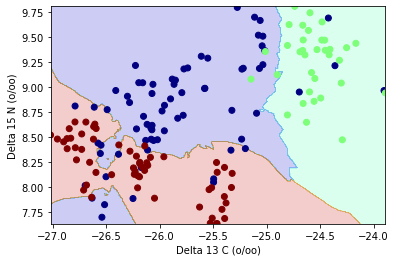

In [21]:
plot_regions(knn, femx, femy)

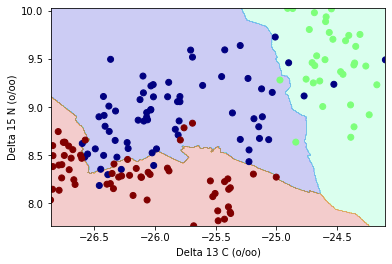

In [22]:
plot_regions(knn, mx, my)